<a href="https://colab.research.google.com/github/visaasmara/Skripsi/blob/main/AGUSTUS_SKRIPSI_OUTLIER_%26_NORMALISASI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **1. Data Preparation**



In [1]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

#Read Data
transaksi = pd.read_excel('/content/drive/MyDrive/Data Koperasi/data_penjualan_agustus.xlsx', header = 0, usecols = 'B,C,D,E,I')

#Preview Data
transaksi

Mounted at /content/drive


,TANGGAL,STRUK,KODE BARANG,NAMA BARANG,SUBTOTAL
0,2023-08-01,714,8990800024615,MENTOS MANGO TARO,6500
1,2023-08-01,714,8997205100333,TOP ADUL DIAPERS M 8,35000
2,2023-08-01,714,8992222050241,GATSBY THC NRML 70G,7000
3,2023-08-01,815,8999908615909,MARINA HBL UV HYDRO,17000
4,2023-08-01,815,8992696427341,DANCOW 3+ VAN 1000G,116000
...,...,...,...,...,...
28424,2023-08-31,1631,8998103001579,CUSSONS KIDS PASTA,5800
28425,2023-08-31,1631,6923655508346,PENSIL TIZO,7600
28426,2023-08-31,1600,8993189270338,CHARM BF WING 10,10000
28427,2023-08-31,1600,8999908060907,MAR HBL PROTECTS200M,7500


In [2]:
#Info of Data
transaksi.info()

#Description of Data
transaksi.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28429 entries, 0 to 28428
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   TANGGAL      28429 non-null  datetime64[ns]
 1   STRUK        28429 non-null  int64         
 2   KODE BARANG  28429 non-null  object        
 3   NAMA BARANG  28429 non-null  object        
 4   SUBTOTAL     28429 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 1.1+ MB


,TANGGAL,STRUK,SUBTOTAL
count,28429,28429.000000,28429.000000
mean,2023-08-14 21:24:41.965598208,1483.922157,14082.760561
min,2023-08-01 00:00:00,702.000000,0.000000
25%,2023-08-06 00:00:00,1108.000000,4700.000000
50%,2023-08-14 00:00:00,1613.000000,8500.000000
75%,2023-08-23 00:00:00,1849.000000,16500.000000
max,2023-08-31 00:00:00,2053.000000,385500.000000
std,NaN,407.275552,20165.950773


### **2. Penanganan Missing Value**

In [3]:
#Check Missing Value
transaksi.isnull()
transaksi.isnull().sum()

TANGGAL        0
STRUK          0
KODE BARANG    0
NAMA BARANG    0
SUBTOTAL       0
dtype: int64

In [4]:
#Drop Row with Missing Value
transaksi = transaksi.dropna()
transaksi.shape

(28429, 5)

### **3. Perhitungan RFM**

### Recency

In [5]:
transaksi['KODE BARANG'] = transaksi['KODE BARANG'].astype("string")
rfm_r = transaksi.groupby(by='KODE BARANG',
						as_index=False)['TANGGAL'].max()
rfm_r.columns = ['KODE BARANG', 'LastPurchaseDate']
recent_date = rfm_r['LastPurchaseDate'].max()
rfm_r['Recency'] = rfm_r['LastPurchaseDate'].apply(
	lambda x: (recent_date - x).days)
rfm_r.sort_values(by='KODE BARANG', ascending=True)

,KODE BARANG,LastPurchaseDate,Recency
0,0,2023-08-30,1
1,100004,2023-08-26,5
2,100008,2023-08-28,3
3,1003,2023-08-31,0
4,10032,2023-08-06,25
...,...,...,...
5873,9923,2023-08-02,29
5874,9924,2023-08-28,3
5875,996,2023-08-31,0
5876,99994,2023-08-04,27


### Frequency

In [6]:
#Calculate The Frequency
transaksi['STRUK'] = transaksi['STRUK'].astype("string")
rfm_f = transaksi.groupby(
    by=['KODE BARANG'], as_index=False)['STRUK'].count()
rfm_f.columns = ['KODE BARANG', 'Frequency']
rfm_f['Frequency'] = rfm_f['Frequency'].astype("int")
rfm_f.sort_values(by='KODE BARANG', ascending=True)

,KODE BARANG,Frequency
0,0,3
1,100004,13
2,100008,20
3,1003,127
4,10032,1
...,...,...
5873,9923,1
5874,9924,2
5875,996,2
5876,99994,1


### Monetary

In [7]:
# Calculate The Monetary
transaksi['Monetary'] = transaksi['SUBTOTAL']
rfm_m = transaksi.groupby('KODE BARANG')['Monetary'].sum()
rfm_m = rfm_m.reset_index()
rfm_m['Monetary'] = rfm_m['Monetary'].astype("int")
rfm_m.sort_values(by='KODE BARANG', ascending=True)

,KODE BARANG,Monetary
0,0,22500
1,100004,152000
2,100008,340000
3,1003,2264500
4,10032,20000
...,...,...
5873,9923,97500
5874,9924,84000
5875,996,5600
5876,99994,21000


### Merging RFM

In [8]:
rfm_rf = pd.merge(rfm_r,rfm_f, on='KODE BARANG', how='inner').drop(
     columns='LastPurchaseDate')
# rfm_rf = pd.merge(rfm_r, rfm_f, on='KODE BARANG', how='inner')
rfm_rf.columns = ['KODE BARANG','Recency', 'Frequency']
rfm_rfm = rfm_rf.merge(rfm_m, on='KODE BARANG', how='inner')
rfm_rfm.columns = ['KODE BARANG','Recency', 'Frequency', 'Monetary']
rfm_rfm

,KODE BARANG,Recency,Frequency,Monetary
0,0,1,3,22500
1,100004,5,13,152000
2,100008,3,20,340000
3,1003,0,127,2264500
4,10032,25,1,20000
...,...,...,...,...
5873,9923,29,1,97500
5874,9924,3,2,84000
5875,996,0,2,5600
5876,99994,27,1,21000


In [9]:
rfm_rfm.describe()

,Recency,Frequency,Monetary
count,5878.000000,5878.000000,5.878000e+03
mean,9.951344,4.836509,6.811140e+04
std,8.804013,8.008311,1.623142e+05
min,0.000000,1.000000,7.000000e+02
25%,3.000000,1.000000,1.610000e+04
50%,7.000000,2.000000,3.300000e+04
75%,16.000000,5.000000,6.800000e+04
max,30.000000,199.000000,6.181800e+06


### **4. Penanganan Outlier**



<Axes: >

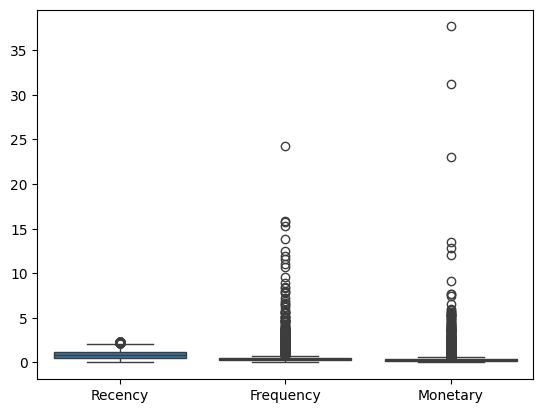

In [10]:
#Check Outlier

import seaborn as sns
import numpy as np
from scipy import stats

rfm = rfm_rfm[['Recency','Frequency', 'Monetary']]
rfmclean = rfm.copy()
z_scores = np.abs(stats.zscore(rfm))

sns.boxplot(z_scores)

<Axes: >

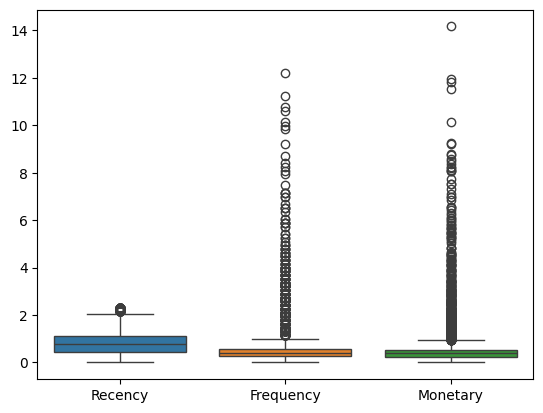

In [11]:
threshold = 10
mean_values = rfm.mean()

for col in rfm.columns:
    outlier_mask = np.abs(stats.zscore(rfm[col])) > threshold
    rfmclean.loc[outlier_mask, col] = mean_values[col]

check = np.abs(stats.zscore(rfmclean))
sns.boxplot(check)

### **5. Normalisasi Nilai RFM**

In [12]:
import sklearn
from sklearn.preprocessing import StandardScaler

# Instantiate
scaler = StandardScaler()

# fit_transform
rfmscaled = scaler.fit_transform(rfmclean)
rfmscaled.shape

rfmscaled = pd.DataFrame(rfmscaled)
rfmscaled.columns = ['Recency','Frequency', 'Monetary']
rfmscaled.head()


,Recency,Frequency,Monetary
0,-1.016821,-0.258772,-0.400202
1,-0.562444,1.317235,0.833363
2,-0.789633,2.420440,2.624176
3,-1.130415,0.030663,0.034274
4,1.709440,-0.573973,-0.424016


<Axes: >

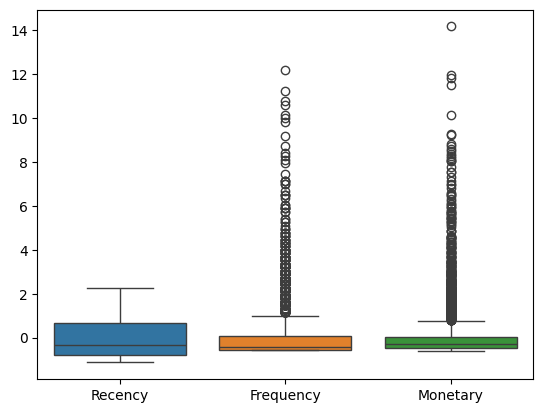

In [13]:
sns.boxplot(rfmscaled)

### **5. K-Means Clustering**

### Elbow Method : Find K

In [14]:
rfm

,Recency,Frequency,Monetary
0,1,3,22500
1,5,13,152000
2,3,20,340000
3,0,127,2264500
4,25,1,20000
...,...,...,...
5873,29,1,97500
5874,3,2,84000
5875,0,2,5600
5876,27,1,21000


In [15]:
rfmscaled

,Recency,Frequency,Monetary
0,-1.016821,-0.258772,-0.400202
1,-0.562444,1.317235,0.833363
2,-0.789633,2.420440,2.624176
3,-1.130415,0.030663,0.034274
4,1.709440,-0.573973,-0.424016
...,...,...,...
5873,2.163817,-0.573973,0.314218
5874,-0.789633,-0.416373,0.185623
5875,-1.130415,-0.416373,-0.561185
5876,1.936629,-0.573973,-0.414490


In [16]:
# Elbow-curve/SSD
from sklearn.cluster import KMeans

ssd = []
range_n_clusters = [1, 2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfmscaled)

    ssd.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [17]:
ssd

[17634.00000000001,
 11774.36303270215,
 7440.886436644198,
 5789.049497997674,
 4628.793635954732,
 3934.7710521504714,
 3303.355479544606,
 2801.1076244707383]

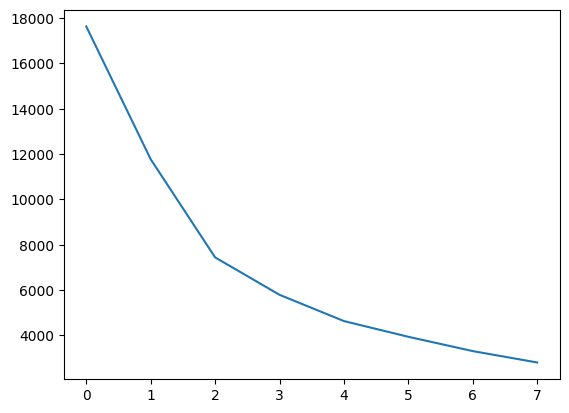

In [18]:
import matplotlib.pyplot as plt
plt.plot(ssd)

### Silhouette Coefficient

In [19]:
from sklearn.metrics import silhouette_score

range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:

    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfmscaled)

    cluster_labels = kmeans.labels_

    # silhouette score
    silhouette_avg = silhouette_score(rfmscaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=2, the silhouette score is 0.5923594486404538


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=3, the silhouette score is 0.4659022805377573


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=4, the silhouette score is 0.4771915384544694


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=5, the silhouette score is 0.4571728003940503


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=6, the silhouette score is 0.3875587402446102


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=7, the silhouette score is 0.39793162087405287


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=8, the silhouette score is 0.4040023829854192


### Clustering

In [20]:
kmeans = KMeans(n_clusters=2, max_iter=50)
kmeans.fit(rfmscaled)

kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 1, 1, ..., 0, 0, 0], dtype=int32)

In [21]:
# assign the label
rfmscaled['Cluster'] = kmeans.labels_
rfmscaled.columns = ['Recency', 'Frequency', 'Monetary', 'Cluster']
rfmscaled

,Recency,Frequency,Monetary,Cluster
0,-1.016821,-0.258772,-0.400202,0
1,-0.562444,1.317235,0.833363,1
2,-0.789633,2.420440,2.624176,1
3,-1.130415,0.030663,0.034274,0
4,1.709440,-0.573973,-0.424016,0
...,...,...,...,...
5873,2.163817,-0.573973,0.314218,0
5874,-0.789633,-0.416373,0.185623,0
5875,-1.130415,-0.416373,-0.561185,0
5876,1.936629,-0.573973,-0.414490,0


In [22]:
final = pd.concat([rfm_rfm, rfmscaled['Cluster']], axis=1)
final

,KODE BARANG,Recency,Frequency,Monetary,Cluster
0,0,1,3,22500,0
1,100004,5,13,152000,1
2,100008,3,20,340000,1
3,1003,0,127,2264500,0
4,10032,25,1,20000,0
...,...,...,...,...,...
5873,9923,29,1,97500,0
5874,9924,3,2,84000,0
5875,996,0,2,5600,0
5876,99994,27,1,21000,0


      Recency  Frequency  Monetary  Cluster
0           1          3     22500        0
1           5         13    152000        1
2           3         20    340000        1
3           0        127   2264500        0
4          25          1     20000        0
...       ...        ...       ...      ...
5873       29          1     97500        0
5874        3          2     84000        0
5875        0          2      5600        0
5876       27          1     21000        0
5877       26          1      1200        0

[5878 rows x 4 columns]


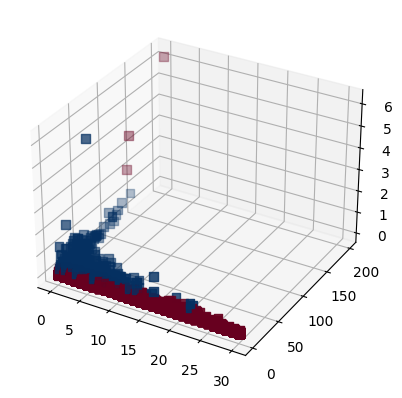

In [23]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import numpy as np

df = pd.DataFrame(final, columns=['Recency', 'Frequency','Monetary',"Cluster"])
print (df)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = np.array(df['Recency'])
y = np.array(df['Frequency'])
z = np.array(df['Monetary'])

ax.scatter(x,y,z, marker="s", c=df["Cluster"], s=40, cmap="RdBu")

plt.show()

In [24]:
import plotly.express as px
#df = px.rfmscaled
fig = px.scatter_3d(final, x='Recency', y='Frequency', z='Monetary',
              color='Cluster')
fig.show()

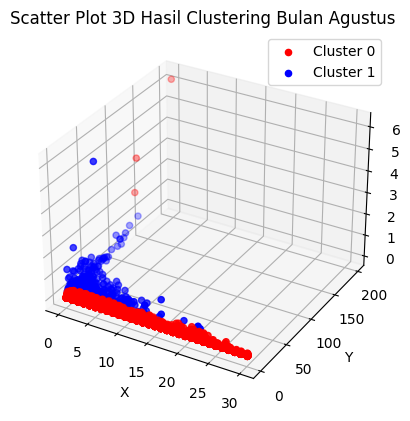

In [25]:
data = pd.DataFrame(final, columns=['Recency', 'Frequency','Monetary',"Cluster"])

# Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Setiap cluster akan memiliki warna yang berbeda
colors = ['r','b', 'y', 'c', 'm']

for cluster_label, color in zip(data['Cluster'].unique(), colors):
    cluster_data = data[data['Cluster'] == cluster_label]
    ax.scatter(cluster_data['Recency'], cluster_data['Frequency'], cluster_data['Monetary'], c=color, label=f'Cluster {cluster_label}')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.title('Scatter Plot 3D Hasil Clustering Bulan Agustus')
plt.legend()
plt.show()